TICA and clustering with CN- of 80:20 KA sims
====

In [1]:
import pyemma
pyemma.__version__

'2.1.1'

In [2]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
from collections import Counter
import mdtraj as md
#from CN_functions import *
#from gen_dtraj_functions import *

Some useful inhouse functions
------

In [4]:
#from plot_functions import *
import pickle

Read in the data
------

In [5]:
# tica_lags = [2,4,6,8,10,12,16,20,24] 
tica_dim = 8
clust_dim = 3
nclust_max = 1000
#nclust = [597,404,428,379,399,354,344,313,267]

tica_lags=[1]
Y = []
Y.append(np.load('Y.npy'))

#file = open("clustering_regspace_nclust-66_clustdim-2.pkl",'r')
file = open("clustering_kmeans_nclust-50_clustdim-2.pkl",'r')
clustering = pickle.load(file)

In [6]:
# np.save('tica_lag',tica_lags[0])
# np.save('tica_dim',tica_dim)
# np.save('clust_dim',clust_dim)
# np.save('nclust_max',nclust_max)

In [7]:
Y[0].shape

(1000, 30006, 8)

/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


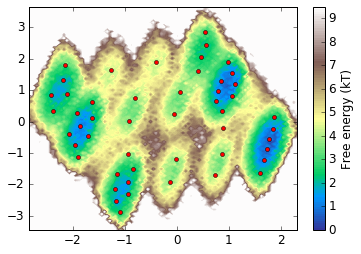

In [8]:
for comp in range(1):
    fig, ax = mplt.plot_free_energy(np.vstack(Y[0])[:,0], np.vstack(Y[0])[:,comp+1],cmap='terrain',nbins=100,ncountours=100)
    
    if ( comp < clust_dim-1 ):
        cc_x = clustering.clustercenters[:,0]
        cc_y = clustering.clustercenters[:,comp+1]
        plot(cc_x,cc_y, linewidth=0, marker='o', markersize=4, color='red') #, markerfacecolor='none')
#     plt.xlim([0.2,0.6])
#     plt.ylim([-1.5,-0.5])
plt.show()

In [9]:
lag=0
H_12, edges_1, edges_2 = np.histogram2d(np.vstack(Y[lag])[:,0], np.vstack(Y[lag])[:,1], bins=75, range=None, normed=None, weights=None )
bins_1 = 0.5*(edges_1[1:] + edges_1[:-1])
bins_2 = 0.5*(edges_2[1:] + edges_2[:-1]) 

H_12 = np.rot90(H_12)
H_12 = np.flipud(H_12)

# avoid zero counts a different way
zmin_nonzero = np.min(H_12[np.where(H_12 > 0)])
z = np.maximum(H_12, zmin_nonzero)
#FE_H_12 = -np.ma.log(H_12)
FE_H_12 = -np.log(z)
FE_H_12 -= np.min(FE_H_12)
FE_max_12 = np.max(FE_H_12)
#FE_H_12 = FE_H_12.filled()

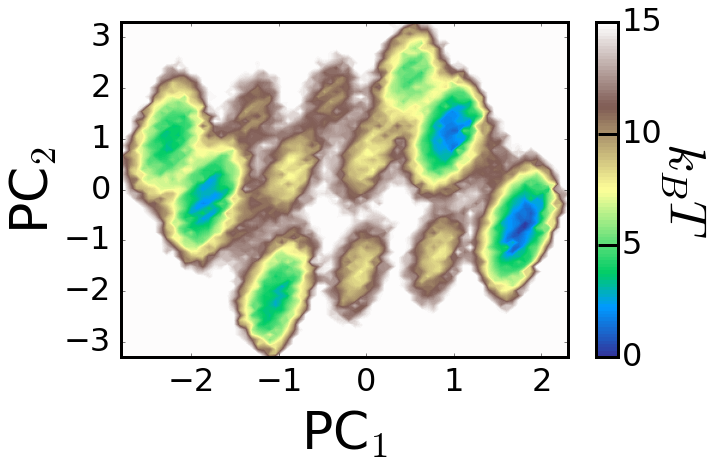

In [10]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
#
kBT = 0.4
vmax = 15
#plt.pcolormesh(bins_1, bins_2, FE_H_12/kBT, cmap='terrain', vmax=FE_max_12)
extent = [edges_2[0], edges_2[-1], edges_1[0], edges_1[-1]]
FE_H_12[np.where(FE_H_12/kBT>vmax)] = vmax*kBT
#plt.contourf(bins_1, bins_2, FE_H_12/kBT, 100, extent=extent, cmap='terrain')
plt.contourf(bins_1, bins_2, FE_H_12/kBT, 100, cmap='terrain',lw=0.1) # to fool anti-aliasing
cs = plt.contourf(bins_1, bins_2, FE_H_12/kBT, 100, cmap='terrain')

# Rasterize the contour collections
#for c in cs.collections:
#    c.set_rasterized(True)

cbar = plt.colorbar(aspect=15)
cbar.set_ticks([0,5,10,15,20,25,30])
#cbar.ax.set_yticklabels([r'0', r'4', r'8',r'12'],fontweight='normal')
cbar.ax.tick_params(labelsize='32',width=3.0,length=20)
cbar.set_label(r'$k_B T$', rotation=270, fontsize='52', labelpad=45)
cbar.ax.get_children()[2].set_linewidth(3)
cbar.ax.get_children()[3].set_linewidth(3)
cbar.outline.set_linewidth(3)
#
ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)
plt.ylabel(r'PC$_2$',fontsize='52',fontweight='normal',labelpad=5)
plt.xlabel(r'PC$_1$',fontsize='52',labelpad=10)
plt.yticks(np.arange(10)*1-3,fontsize='32')
plt.xticks(np.arange(10)*1-3,fontsize='32')
ax.tick_params(axis='both', which='major', pad=10)
# legend
#plt.legend()
#legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.18, 1.1))
#frame = legend.get_frame()
#frame.set_linewidth('3.0')
#ltext = legend.get_texts()
#plt.setp(ltext, fontweight='normal')
#
plt.ylim([-3.3,3.3])
plt.xlim([-2.8,2.3])
plt.savefig('fig_IC12_ss123_Btype.svg', format='svg', dpi=800, bbox_inches="tight")
plt.savefig('fig_IC12_ss123_Btype.eps', format='eps', dpi=800, bbox_inches="tight")
plt.show()

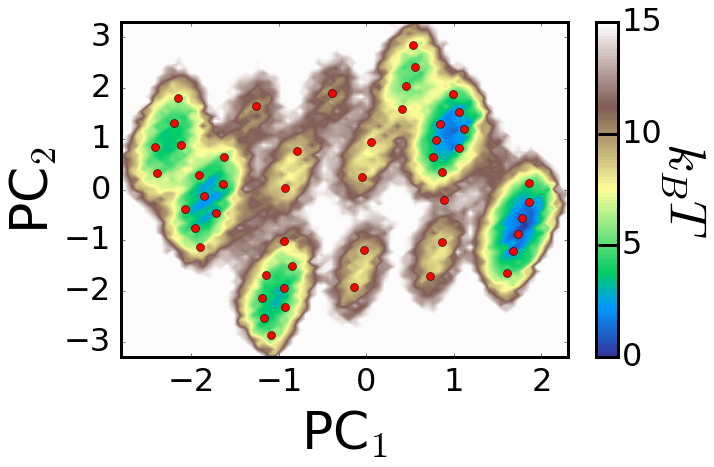

In [11]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
#
kBT = 0.4
vmax = 15
#plt.pcolormesh(bins_1, bins_2, FE_H_12/kBT, cmap='terrain', vmax=FE_max_12)
extent = [edges_2[0], edges_2[-1], edges_1[0], edges_1[-1]]
FE_H_12[np.where(FE_H_12/kBT>vmax)] = vmax*kBT
#plt.contourf(bins_1, bins_2, FE_H_12/kBT, 100, extent=extent, cmap='terrain')
plt.contourf(bins_1, bins_2, FE_H_12/kBT, 100, cmap='terrain',lw=0.1) # to fool anti-aliasing
cs = plt.contourf(bins_1, bins_2, FE_H_12/kBT, 100, cmap='terrain')


if ( comp < clust_dim-1 ):
    cc_x = clustering.clustercenters[:,0]
    cc_y = clustering.clustercenters[:,comp+1]
    plot(cc_x,cc_y, linewidth=0, marker='o', markersize=8, color='red') #, markerfacecolor='none')

# Rasterize the contour collections
#for c in cs.collections:
#    c.set_rasterized(True)

cbar = plt.colorbar(aspect=15)
cbar.set_ticks([0,5,10,15,20,25,30])
#cbar.ax.set_yticklabels([r'0', r'4', r'8',r'12'],fontweight='normal')
cbar.ax.tick_params(labelsize='32',width=3.0,length=20)
cbar.set_label(r'$k_B T$', rotation=270, fontsize='52', labelpad=45)
cbar.ax.get_children()[2].set_linewidth(3)
cbar.ax.get_children()[3].set_linewidth(3)
cbar.outline.set_linewidth(3)
#
ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)
plt.ylabel(r'PC$_2$',fontsize='52',fontweight='normal',labelpad=5)
plt.xlabel(r'PC$_1$',fontsize='52',labelpad=10)
plt.yticks(np.arange(10)*1-3,fontsize='32')
plt.xticks(np.arange(10)*1-3,fontsize='32')
ax.tick_params(axis='both', which='major', pad=10)
# legend
#plt.legend()
#legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.18, 1.1))
#frame = legend.get_frame()
#frame.set_linewidth('3.0')
#ltext = legend.get_texts()
#plt.setp(ltext, fontweight='normal')
#
plt.ylim([-3.3,3.3])
plt.xlim([-2.8,2.3])
plt.savefig('fig_IC12_ss123_T04_Btype_wclusters.svg', format='svg', dpi=800, bbox_inches="tight")
plt.savefig('fig_IC12_ss123_T04_Btype_wclusters.eps', format='eps', dpi=800, bbox_inches="tight")
plt.show()

In [11]:
H_12, edges_1, edges_2 = np.histogram2d(np.vstack(Y[lag])[:,0], np.vstack(Y[lag])[:,2], bins=50, range=None, normed=None, weights=None )
bins_1 = 0.5*(edges_1[1:] + edges_1[:-1])
bins_2 = 0.5*(edges_2[1:] + edges_2[:-1]) 

H_12 = np.rot90(H_12)
H_12 = np.flipud(H_12)

# avoid zero counts a different way
zmin_nonzero = np.min(H_12[np.where(H_12 > 0)])
z = np.maximum(H_12, zmin_nonzero)
#FE_H_12 = -np.ma.log(H_12)
FE_H_12 = -np.log(z)
FE_H_12 -= np.min(FE_H_12)
FE_max_12 = np.max(FE_H_12)
#FE_H_12 = FE_H_12.filled()

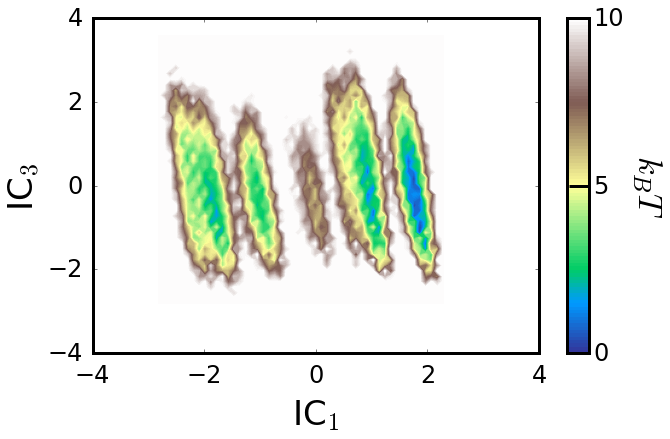

In [12]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
#
kBT = 0.4
#plt.pcolormesh(bins_1, bins_2, FE_H_12/kBT, cmap='terrain', vmax=FE_max_12)
extent = [edges_2[0], edges_2[-1], edges_1[0], edges_1[-1]]
FE_H_12[np.where(FE_H_12/kBT>vmax)] = vmax*kBT
#plt.contourf(bins_1, bins_2, FE_H_12/kBT, 100, extent=extent, cmap='terrain')
plt.contourf(bins_1, bins_2, FE_H_12/kBT, 100, cmap='terrain',lw=0.1) # to fool anti-aliasing
cs = plt.contourf(bins_1, bins_2, FE_H_12/kBT, 100, cmap='terrain')

# Rasterize the contour collections
#for c in cs.collections:
#    c.set_rasterized(True)

cbar = plt.colorbar(aspect=15)
cbar.set_ticks([0,5,10,15,20,25,30])
#cbar.ax.set_yticklabels([r'0', r'4', r'8',r'12'],fontweight='normal')
cbar.ax.tick_params(labelsize='24',width=3.0,length=20)
cbar.set_label(r'$k_B T$', rotation=270, fontsize='34', labelpad=40)
cbar.ax.get_children()[2].set_linewidth(3)
cbar.ax.get_children()[3].set_linewidth(3)
cbar.outline.set_linewidth(3)
#
ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)
plt.ylabel(r'IC$_3$',fontsize='34',fontweight='normal')
plt.xlabel(r'IC$_1$',fontsize='34',labelpad=10)
plt.yticks(np.arange(5)*2-4,fontsize='24')
plt.xticks(np.arange(5)*2-4,fontsize='24')
ax.tick_params(axis='both', which='major', pad=10)
# legend
#plt.legend()
#legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.18, 1.1))
#frame = legend.get_frame()
#frame.set_linewidth('3.0')
#ltext = legend.get_texts()
#plt.setp(ltext, fontweight='normal')
#
# plt.ylim([-3.5,3.5])
# plt.xlim([-2.4,2.9])
plt.savefig('fig_IC13_ss123_Btype.svg', format='svg', dpi=800)
plt.savefig('fig_IC13_ss123_Btype.eps', format='eps', dpi=800)
plt.show()

In [13]:
# #  clustering
# print lag
# print tica_lags[lag]
# nclust = [617,597,462,404,419,428,409,379]
# with open('clustering_regspaceB_ticadim-'+str(tica_dim)+'_ticalag-'+str(tica_lags[lag])+'_nclust-'+str(nclust[lag])+'_clustdim-'+str(clust_dim)+'.pkl', 'rb') as f:
#     clustering = pickle.load(f)

# nclust = clustering.n_clusters
# print nclust
# np.save('nclust',nclust)

0
1


IOError: [Errno 2] No such file or directory: 'clustering_regspaceB_ticadim-8_ticalag-1_nclust-617_clustdim-3.pkl'

In [ ]:
# for comp in range(3):
#     for lag in range(len(tica_lags)):
#         tmp = plt.hist(np.vstack(Y[lag])[:,comp],50)
#         plt.show()
#         print 'DONE WITH LAG '+str(tica_lags[lag])
#     print 'DONE WITH COMP '+str(comp)

In [9]:
dtrajs = clustering.dtrajs

In [11]:
np.save('dtrajs_regspaceB_nclust-50_ticadim-'+str(tica_dim)+'_ticalag-'+str(tica_lags[0])+'_clustdim-'+str(clust_dim),dtrajs)